## Test the different geometries

In [14]:
from pathlib import Path
import numpy as np
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))
import heisensim as sim

CMAP = plt.get_cmap("tab20c")
R_BL = 0.4

In [9]:
def pick_max_points(sampler, seed=5):
    np.random.seed(seed)
    points = sampler.sample_positions(1)
    try:
        while True:
            points = sampler._append_to_pos(points)
    except RuntimeError:
        pass
    return points


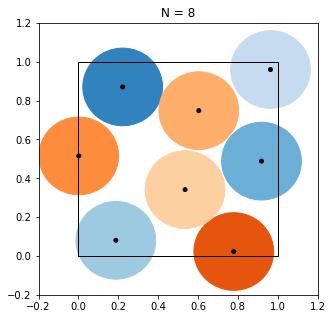

In [16]:
np.random.seed(5)
box = sim.Box(length_z = 0, r_bl=R_BL)
points = pick_max_points(box)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-r_bl,1+r_bl)
ax.set_ylim(-r_bl,1+r_bl)
for i in range(points.shape[0]):
    ax.add_patch(plt.Circle(points[i,:2], R_BL/2, color=CMAP(i)))
    ax.add_patch(plt.Circle(points[i,:2], 0.01, color="black"))
ax.add_patch(plt.Rectangle((0,0), 1, 1, fill=False))
ax.set_title(f"N = {points.shape[0]}")
fig.show()


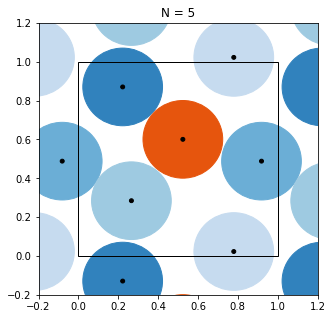

In [17]:
np.random.seed(5)
boxPBC = sim.BoxPBC(length_z = 0, r_bl=R_BL)
points = pick_max_points(boxPBC)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-r_bl,1+r_bl)
ax.set_ylim(-r_bl,1+r_bl)
for i in range(points.shape[0]):
    for x in (-1,0,1):
        for y in (-1,0,1):
            ax.add_patch(plt.Circle(points[i,:2]+[x,y], R_BL/2, color=CMAP(i)))
            ax.add_patch(plt.Circle(points[i,:2]+[x,y], 0.01, color="black"))
ax.add_patch(plt.Rectangle((0,0), 1, 1, fill=False))
ax.set_title(f"N = {points.shape[0]}")
fig.show()


In [7]:
plt.get_cmap("Set2")(10)

(0.7019607843137254, 0.7019607843137254, 0.7019607843137254, 1.0)